### Q1.
데이터 설명 : 고객의 신상정보 데이터를 통한 회사 서비스 이탈 예측 (종속변수 : Exited)
            
x_train : https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/X_train.csv          
y_train : https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/y_train.csv

In [1]:
import pandas as pd
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/X_test.csv")

In [5]:
train=pd.merge(x_train,y_train)

In [12]:
# 변수분류
target='Exited'
feature=train.columns.difference([target,"CustomerId"])

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb

In [14]:
train[feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              6499 non-null   int64  
 1   Balance          6499 non-null   float64
 2   CreditScore      6499 non-null   int64  
 3   EstimatedSalary  6499 non-null   float64
 4   Gender           6499 non-null   object 
 5   Geography        6499 non-null   object 
 6   HasCrCard        6499 non-null   int64  
 7   IsActiveMember   6499 non-null   int64  
 8   NumOfProducts    6499 non-null   int64  
 9   Surname          6499 non-null   object 
 10  Tenure           6499 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 558.6+ KB


In [15]:
# 독립변수의 분류
numeric_feature=["Age","Balance","CreditScore","EstimatedSalary"]
category_feature=["HasCrCard","IsActiveMember","NumOfProducts","Tenure"]

In [26]:
# 요약
train[numeric_feature].describe()

,Age,Balance,CreditScore,EstimatedSalary
count,6499.000000,6499.000000,6499.000000,6499.000000
mean,38.957070,76836.581068,650.396830,100346.564524
std,10.502803,62407.570894,96.618957,57944.655305
min,18.000000,0.000000,350.000000,11.580000
25%,32.000000,0.000000,584.000000,50907.565000
50%,37.000000,97560.160000,651.000000,100496.840000
75%,44.000000,127844.690000,718.000000,150480.155000
max,92.000000,238387.560000,850.000000,199970.740000


<Figure size 640x480 with 0 Axes>

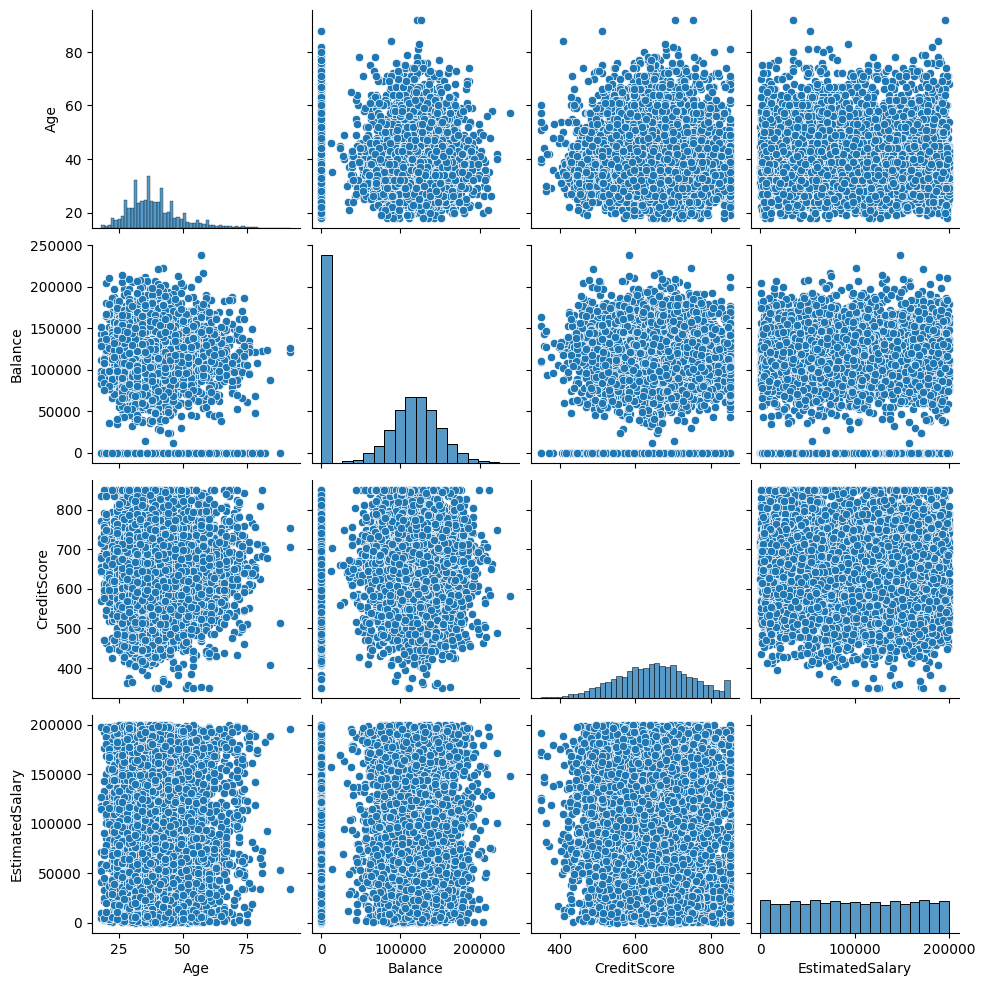

In [17]:
# 시각화
plt.figure()
sb.pairplot(train[numeric_feature])
plt.show()
plt.close()

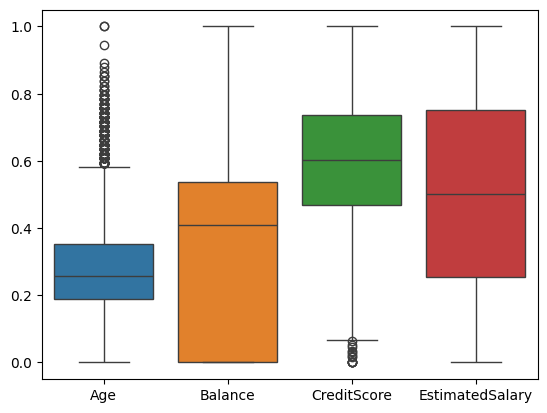

In [18]:
# 시각화 2
import sklearn.preprocessing as skpre
scale=skpre.MinMaxScaler()
mmscale_train=train.copy()
mmscale_train[numeric_feature]=scale.fit_transform(train[numeric_feature])
plt.figure()
sb.boxplot(mmscale_train[numeric_feature])
plt.show()
plt.close()

In [21]:
import statsmodels.api as sm
import scipy as sp

In [24]:
# ttest를 통한 변수 유의미성 확인
train[target].value_counts()

Exited
0    5175
1    1324
Name: count, dtype: int64

In [27]:
# 데이터간 mim max 간 차이가 심하므로 mmscale_mmscale_train 사용
group0=mmscale_train.loc[mmscale_train[target]==0]
group1=mmscale_train.loc[mmscale_train[target]==1]

In [31]:
result=[]
for col in list(numeric_feature):
    sts,pvalue=sp.stats.ttest_ind(group0[col],group1[col])
    if pvalue<0.05:
        result.append({'feature':col,"stats":sts,"P_value":pvalue,"result":"그룹간 차이 발생"})
    else:
        result.append({'feature':col,"stats":sts,"P_value":pvalue,"result":"통계적으로 유의미하지않음"})

In [32]:
pd.DataFrame(result)

,feature,stats,P_value,result
0,Age,-24.434159,3.194697e-126,그룹간 차이 발생
1,Balance,-8.970355,3.807366e-19,그룹간 차이 발생
2,CreditScore,2.510419,1.208290e-02,그룹간 차이 발생
3,EstimatedSalary,-0.711457,4.768264e-01,통계적으로 유의미하지않음
